#### Import librairies for EDA

In [13]:
import wandb
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt

#### Plotting Helper funtion

In [34]:
def plot_boxplot(df, num_var):
    # Create price box plot
    fig = plt.figure(figsize =(10, 7))
    plt.boxplot(df[num_var])
    # show plot
    plt.show()

In [35]:
def plot_histrogram(df, num_var, num_bins = 50):
    # created distibution
    fig = plt.figure(figsize =(10, 7))
    plt.hist(df[num_var], bins = num_bins , color = 'blue', edgecolor = 'black')
    plt.show()

#### Retrieve the nyc price sample data set from weights and biases

In [39]:
 run = wandb.init(project="nyc_airbnb", group="eda", save_code=True)
 local_path = wandb.use_artifact("sample.csv:latest").file()
 df = pd.read_csv(local_path)

#### Inspect sample nyc airbnb data

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20000 non-null  int64  
 1   name                            19993 non-null  object 
 2   host_id                         20000 non-null  int64  
 3   host_name                       19992 non-null  object 
 4   neighbourhood_group             20000 non-null  object 
 5   neighbourhood                   20000 non-null  object 
 6   latitude                        20000 non-null  float64
 7   longitude                       20000 non-null  float64
 8   room_type                       20000 non-null  object 
 9   price                           20000 non-null  int64  
 10  minimum_nights                  20000 non-null  int64  
 11  number_of_reviews               20000 non-null  int64  
 12  last_review                     

In [41]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,9138664,Private Lg Room 15 min to Manhattan,47594947,Iris,Queens,Sunnyside,40.74271,-73.92493,Private room,74,2,6,2019-05-26,0.13,1,5
1,31444015,TIME SQUARE CHARMING ONE BED IN HELL'S KITCHEN...,8523790,Johlex,Manhattan,Hell's Kitchen,40.76682,-73.98878,Entire home/apt,170,3,0,NaN,NaN,1,188
2,8741020,Voted #1 Location Quintessential 1BR W Village...,45854238,John,Manhattan,West Village,40.73631,-74.00611,Entire home/apt,245,3,51,2018-09-19,1.12,1,0
3,34602077,Spacious 1 bedroom apartment 15min from Manhattan,261055465,Regan,Queens,Astoria,40.76424,-73.92351,Entire home/apt,125,3,1,2019-05-24,0.65,1,13
4,23203149,Big beautiful bedroom in huge Bushwick apartment,143460,Megan,Brooklyn,Bushwick,40.69839,-73.92044,Private room,65,2,8,2019-06-23,0.52,2,8


#### Generate an EDA report for the nyc airbnb sample data

In [42]:
profile = pandas_profiling.ProfileReport(df)
profile.to_widgets()

Summarize dataset:   0%|          | 0/29 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

#### EDA highlight

* last_review has 4123 (20.6%) missing values
* reviews_per_month has 4123 (20.6%) missing values
* last_review is of object type vs. date type
* prices has significant outliers - see below

##### Price Variable EDA Overview

In [44]:
df['price'].describe()

count    20000.000000
mean       153.269050
std        243.325609
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [45]:
df['price'].value_counts().sort_values(ascending = False)

100    856
150    821
50     636
200    590
75     570
      ... 
376      1
273      1
488      1
334      1
419      1
Name: price, Length: 544, dtype: int64

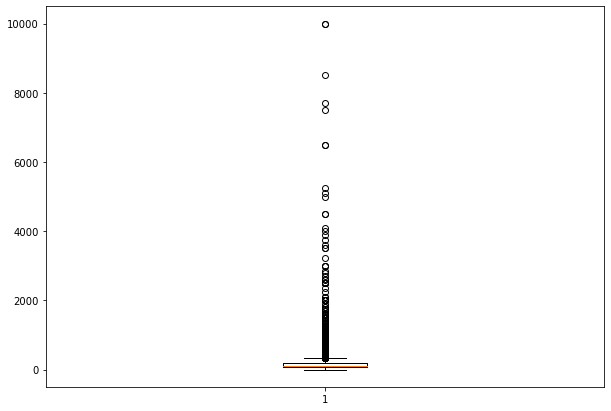

In [46]:
# Create price box plot
plot_boxplot(df, 'price')

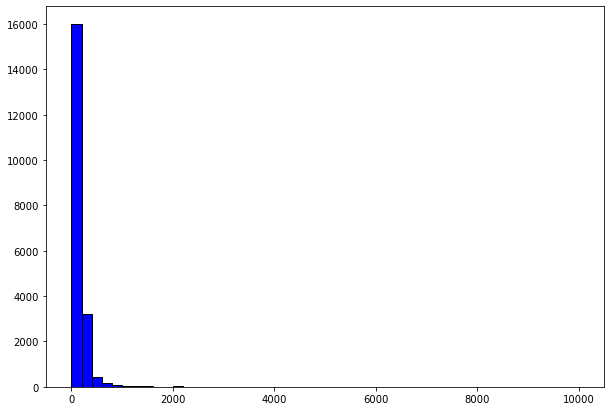

In [48]:
# created distibution
plot_histrogram(df, 'price', num_bins = 50)

#### Simple Cleanup - drop price outliers

 After talking to your stakeholders, you decide to consider from a minimum of 10 dollars to a maximum of 350 dollars per night.

In [49]:
# Drop outliers
min_price = 10
max_price = 350
idx = df['price'].between(min_price, max_price)
df = df[idx].copy()

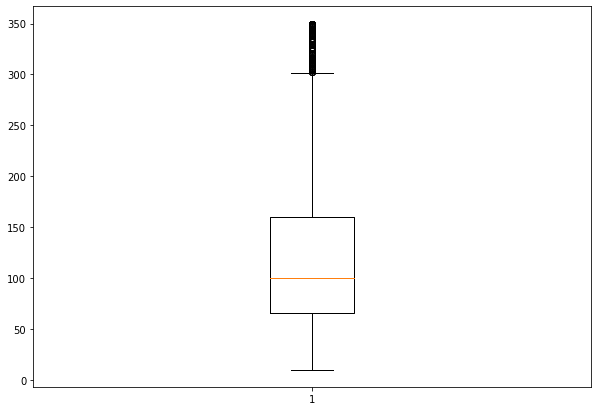

In [51]:
# check cleaned price box plot
plot_boxplot(df, 'price')

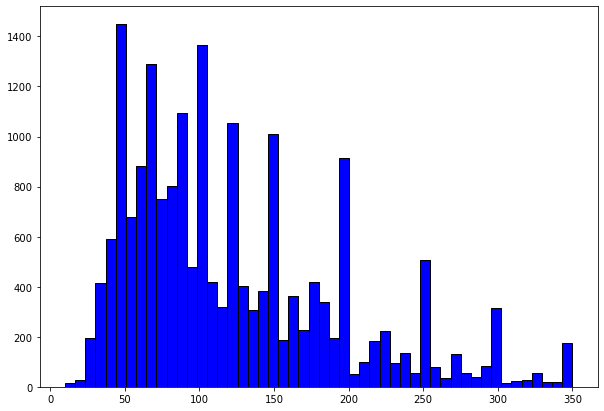

In [52]:
# Check distribution of clean price distibution
plot_histrogram(df, 'price', num_bins = 50)

In [53]:
# Convert last_review to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19001 entries, 0 to 19999
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              19001 non-null  int64         
 1   name                            18994 non-null  object        
 2   host_id                         19001 non-null  int64         
 3   host_name                       18993 non-null  object        
 4   neighbourhood_group             19001 non-null  object        
 5   neighbourhood                   19001 non-null  object        
 6   latitude                        19001 non-null  float64       
 7   longitude                       19001 non-null  float64       
 8   room_type                       19001 non-null  object        
 9   price                           19001 non-null  int64         
 10  minimum_nights                  19001 non-null  int64         
 11  nu

#### Finish Weights and Biases Run

In [57]:
run.finish()